<a href="https://colab.research.google.com/github/japhari/reinforcement-learning/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get update


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.6 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,068 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [57.7 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,417 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [

In [ ]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, render_mode="rgb_array",  map_name="4x4", is_slippery=False)

In [ ]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
num_episodes = 80000
max_steps_per_episode = 100

learning_rate = 0.8
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.00005

In [ ]:
rewards_all_episodes = []
for episode in range(num_episodes):
    state = env.reset()[0]
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
      #clear_output(wait=True)
      # screen = env.render()
      # plt.imshow(screen)
      # plt.axis('off')  # Tắt trục để chỉ hiển thị hình ảnh
      # plt.show()
      # print("Step: ", step)
      # time.sleep(0.2)
      # Exploration-exploitation trade-off
      exploration_rate_threshold = random.uniform(0, 1)
      if exploration_rate_threshold > exploration_rate:
          action = np.argmax(q_table[state,:])
      else:
          action = env.action_space.sample()
      new_state, reward, done, truncated, info = env.step(action)
      # Update Q-table for Q(s,a)
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
      learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
      state = new_state
      rewards_current_episode += reward
      if done == True:
        break
    print("Episode: " + str(episode) + " Reward of Current Episode: " + str(rewards_current_episode)  + " Exploration Rate: " + str(exploration_rate))
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

Streaming output truncated to the last 5000 lines.
Episode: 75000 Reward of Current Episode: 1.0 Exploration Rate: 0.02449540285092688
Episode: 75001 Reward of Current Episode: 1.0 Exploration Rate: 0.0244942281101531
Episode: 75002 Reward of Current Episode: 1.0 Exploration Rate: 0.02449305342811488
Episode: 75003 Reward of Current Episode: 1.0 Exploration Rate: 0.024491878804809304
Episode: 75004 Reward of Current Episode: 1.0 Exploration Rate: 0.02449070424023343
Episode: 75005 Reward of Current Episode: 1.0 Exploration Rate: 0.024489529734384306
Episode: 75006 Reward of Current Episode: 1.0 Exploration Rate: 0.024488355287259
Episode: 75007 Reward of Current Episode: 1.0 Exploration Rate: 0.0244871808988546
Episode: 75008 Reward of Current Episode: 1.0 Exploration Rate: 0.024486006569168148
Episode: 75009 Reward of Current Episode: 1.0 Exploration Rate: 0.024484832298196698
Episode: 75010 Reward of Current Episode: 1.0 Exploration Rate: 0.02448365808593734
Episode: 75011 Reward of 

In [ ]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000


********Average reward per thousand episodes********

1000 :  0.01800000000000001
2000 :  0.028000000000000018
3000 :  0.058000000000000045
4000 :  0.07200000000000005
5000 :  0.12500000000000008
6000 :  0.1320000000000001
7000 :  0.1580000000000001
8000 :  0.19900000000000015
9000 :  0.22100000000000017
10000 :  0.2880000000000002
11000 :  0.2990000000000002
12000 :  0.33100000000000024
13000 :  0.3760000000000003
14000 :  0.3890000000000003
15000 :  0.45200000000000035
16000 :  0.44300000000000034
17000 :  0.5100000000000003
18000 :  0.5200000000000004
19000 :  0.5600000000000004
20000 :  0.5550000000000004
21000 :  0.6060000000000004
22000 :  0.6260000000000004
23000 :  0.6310000000000004
24000 :  0.6550000000000005
25000 :  0.6710000000000005
26000 :  0.6850000000000005
27000 :  0.6880000000000005
28000 :  0.7420000000000005
29000 :  0.7350000000000005
30000 :  0.7320000000000005
31000 :  0.7770000000000006
32000 :  0.7690000000000006
33000 :  0.7830000000000006
34000 :  0.79800000

In [ ]:
print("\n\n********Q-table********\n")
print(q_table)




********Q-table********

[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


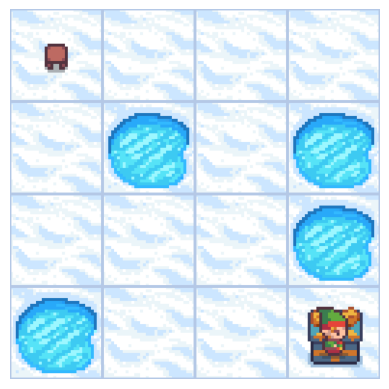

****You reached the goal!****


In [ ]:
for episode in range(5):
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):
      clear_output(wait=True)
      screen = env.render()
      plt.imshow(screen)
      plt.axis('off')  # Tắt trục để chỉ hiển thị hình ảnh
      plt.show()
      time.sleep(1)
      action = np.argmax(q_table[state,:])
      new_state, reward, done, truncated, info = env.step(action)
      if done:
        if reward == 1:
            clear_output(wait=True)
            screen = env.render()
            plt.imshow(screen)
            plt.axis('off')  # Tắt trục để chỉ hiển thị hình ảnh
            plt.show()
            time.sleep(3)
            print("****You reached the goal!****")
        else:
            print("****You fell through a hole!****")
            time.sleep(3)
            clear_output(wait=True)
        break
      state = new_state


In [ ]:
# Q-learning algorithm
for episode in range(num_episodes):
    # initialize new episode params

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        # Take new action
        # Update Q-table
        # Set new state
        # Add new reward

    # Exploration rate decay
    # Add current episode reward to total rewards list